# STEP 1
- Install the dependencies to develop the exercise.

In [34]:
%pip install kagglehub pandas matplotlib seaborn  



Note: you may need to restart the kernel to use updated packages.


- load the dataframe with pandas.

In [25]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("neurocipher/heartdisease")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/Heart_Disease_Prediction.csv")

print(df.head())


Path to dataset files: C:\Users\miguel.vanegas-c\.cache\kagglehub\datasets\neurocipher\heartdisease\versions\1
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                       

- Binarize the target column presence = 1 y absence = 0.

In [26]:
# binarize the target column
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

## EDA: 
1. Sumarry stats:

In [27]:
df.info()
df.describe(include="all")

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


- Information about each piece of data is displayed, such as its type, the count of non-null elements, the column name, and the order.
- The other table shows data such as the total for each column, the mean, the standard deviation, the minimum and maximum values, where the behavior of each characteristic can be seen.

2. Handle missing


In [28]:
df.isnull().sum()
df.isnull().mean() * 100


Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease              0.0
dtype: float64

If you find null values, there are several possible solutions, depending on the number of null values.
- You can delete the row.
- Fill in with the mode.
- Fill in with the mean.

All this is done with the intention of keeping the data clean and ensuring that no data relevant to the sample is lost.

The mean method is used.

In [32]:
columnas = df.columns
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())


Note: In this case the data does not have nulls.

3. Handle outliers

- The interquartile range method is used. 

Age: 0 outliers
Sex: 0 outliers
Chest pain type: 20 outliers
BP: 9 outliers
Cholesterol: 5 outliers
FBS over 120: 40 outliers
EKG results: 0 outliers
Max HR: 1 outliers
Exercise angina: 0 outliers
ST depression: 4 outliers
Slope of ST: 0 outliers
Number of vessels fluro: 19 outliers
Thallium: 0 outliers
Heart Disease: 0 outliers


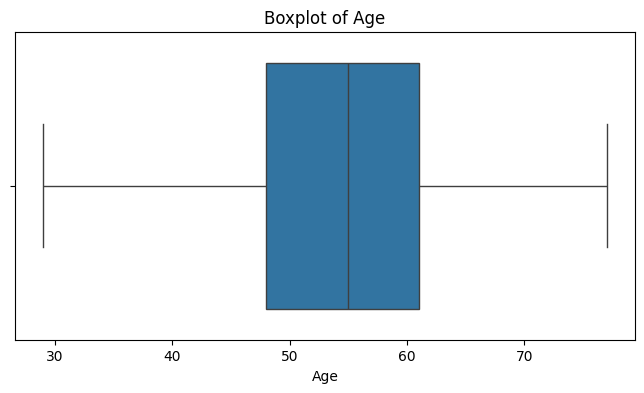

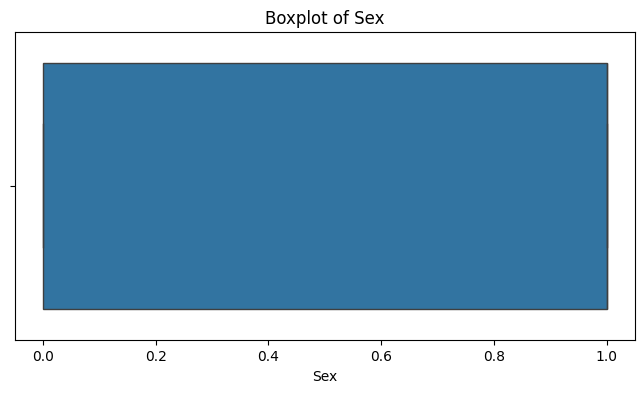

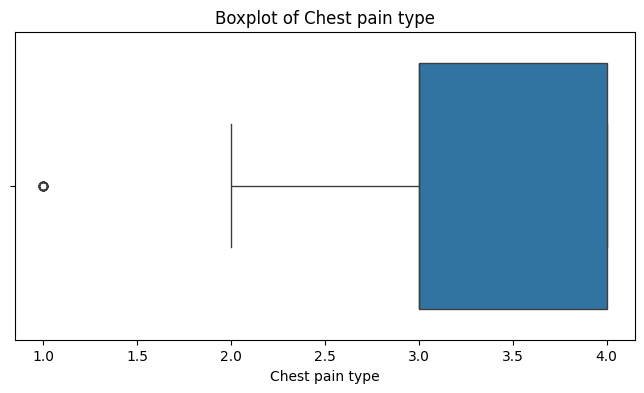

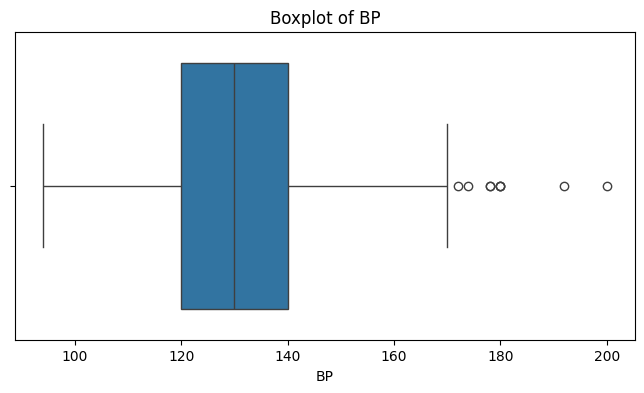

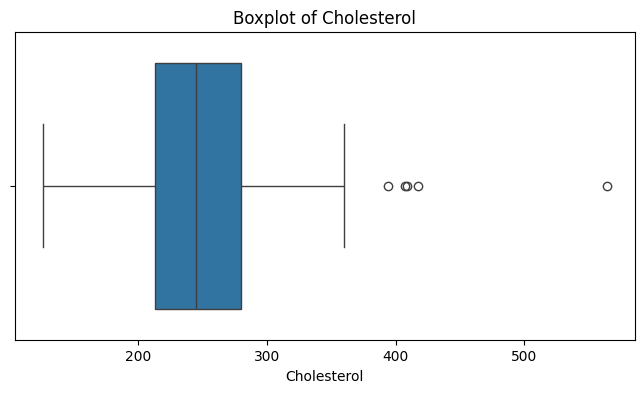

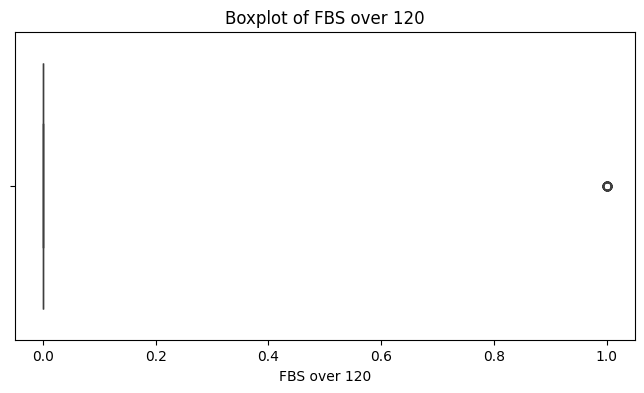

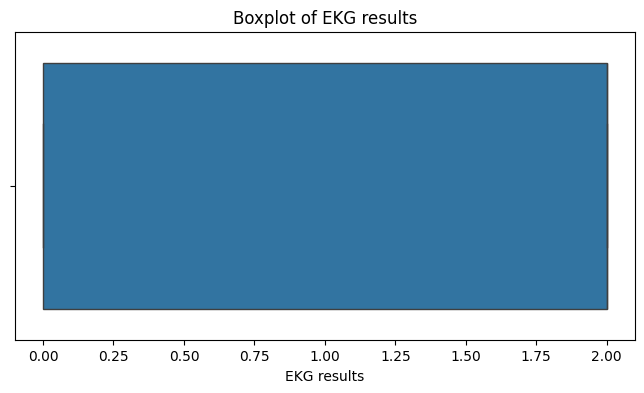

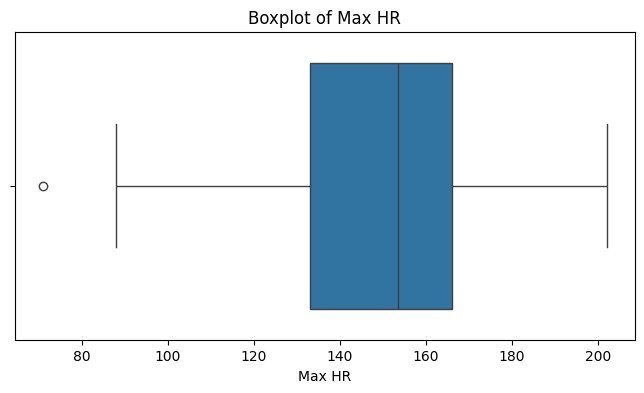

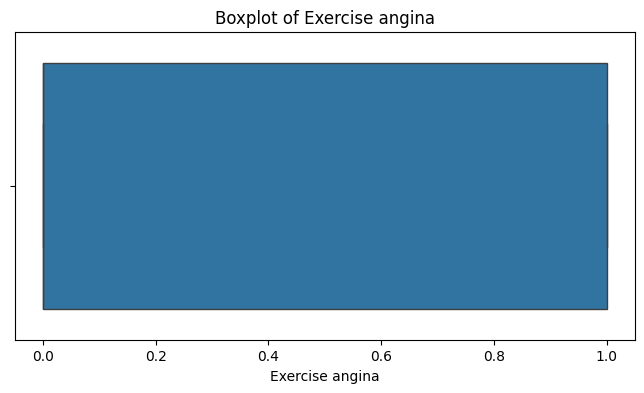

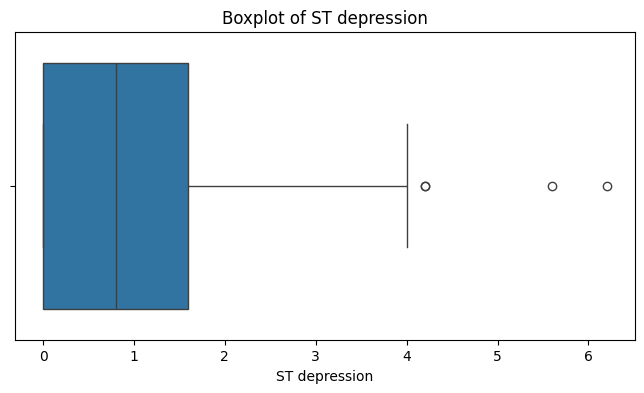

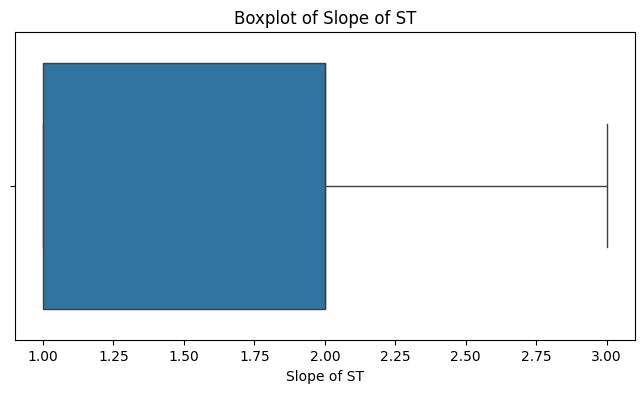

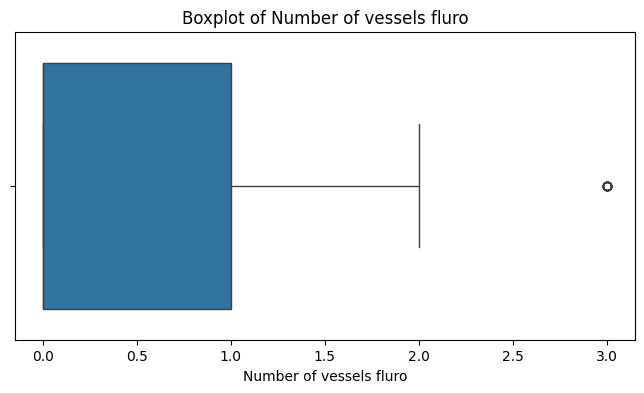

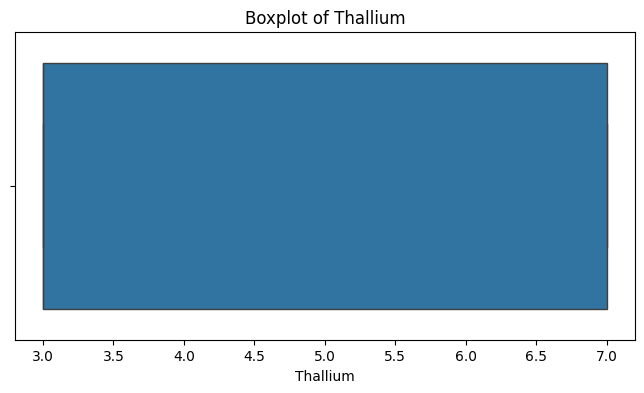

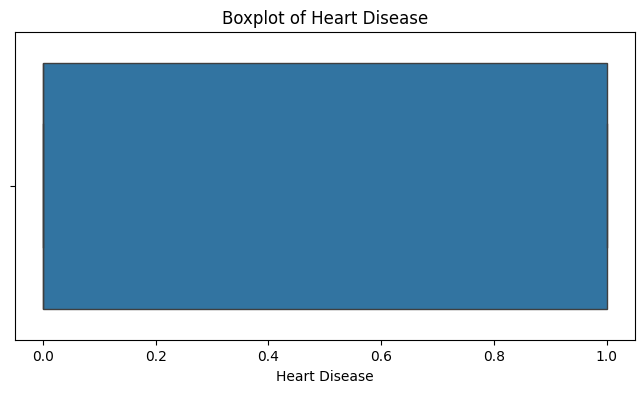

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas = df.columns
for col in df.columns:   
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5*IQR) | 
                (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')


In this case, the data is left as is so that it does not affect the problem.

## PREP
- 70% to train.
- 30% to test.
